# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [21]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [22]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [23]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby(['type']).count()['ride_id']
city_ride_count.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [24]:
# 2. Get the total drivers for each city type
city_driver_count = city_data_df.groupby(['type']).sum()['driver_count']
city_driver_count.head()


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [25]:
#  3. Get the total amount of fares for each city type
city_fare = pyber_data_df.groupby(['type']).sum()['fare']
city_fare.head()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [26]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = city_fare / city_ride_count
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [27]:
# 5. Get the average fare per driver for each city type.
average_fare_per_driver = city_fare / city_driver_count
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [28]:
summary_df = pyber_data_df['type']
summary_df

0       Urban
1       Urban
2       Urban
3       Urban
4       Urban
        ...  
2370    Rural
2371    Rural
2372    Rural
2373    Rural
2374    Rural
Name: type, Length: 2375, dtype: object

In [29]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame({
    "Total Rides": city_ride_count, "Total Drivers" : city_driver_count, "Total Fares" : city_fare, "Average Fares per Ride" : average_fare_per_ride, "Average Fare per Driver" :  average_fare_per_driver
})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [30]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [31]:
#  8. Format the columns
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fares per Ride"] = summary_df["Average Fares per Ride"].map("${:.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [32]:
# pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])
# pyber_data_df.info()

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [33]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_df = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]
new_df


fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [34]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#new_df['date'] = pd.to_datetime(new_df['date'])
new_df = new_df.reset_index()
new_df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [35]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
new_df_pivot = new_df.pivot(index = 'date', columns = 'type', values = 'fare')
new_df_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [36]:
# Executing step 13 here as it affects the rows differently and better matches the expected graph
new_df_pivot.index = pd.to_datetime(new_df_pivot.index)

In [37]:
new_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [38]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-02':'2018-04-29'.
new_df_date = new_df_pivot.loc['1/1/2019' : '4/29/2019']
new_df_date


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [39]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# new_df_date.index = pd.to_datetime(new_df_date.index)

In [40]:
# 14. Check that the datatype for the index is datetime using df.info()
new_df_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [41]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_df = new_df_date.resample('1W').sum()
resample_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<Figure size 432x288 with 0 Axes>

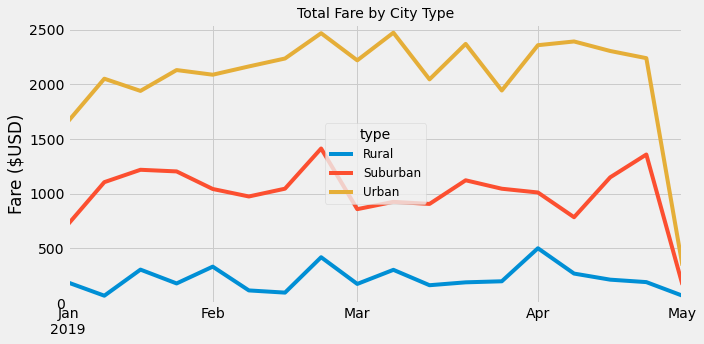

In [54]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig = plt.figure()
ax=resample_df.plot(figsize=(10,5))
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("")
ax.set_title("Total Fare by City Type",fontsize = 14)
ax.set_ylim(0,2550)
ax.set_xlim('2019-1-1', '2019-4-29')
ax.legend(loc = "center", fontsize = 12, title = "type")
ax.grid(True)
plt.tight_layout()
plt.savefig("analysis/PyBer_fare_summary.png")


In [43]:
resample_df.describe()

type,Rural,Suburban,Urban
count,18.000000,18.000000,18.000000
mean,221.182778,1002.847778,2078.245000
std,116.607481,275.753725,480.206367
min,67.600000,167.920000,342.630000
25%,166.327500,910.967500,2045.922500
50%,190.805000,1043.925000,2190.420000
75%,295.402500,1142.502500,2343.475000
max,501.240000,1412.740000,2470.930000
